[학습목표]<br>
박스플롯을 이용하여 데이터의 통계와 이상치를 표현할 수 있다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# 그래프에 한글 설정
plt.rcParams['font.family'] = 'd2coding'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 박스플롯

* 데이터로부터 얻어진 아래의 다섯 가지 요약 수치를 사용해서 그려진다.<br>
최소값<br>
제 1사분위 수 (Q1) : 전체 데이터 중 하위 25%에 해당하는 값<br>
제 2사분위 수 또는 중위수 (Q2)<br>
제 3사분위 수 (Q3) : 전체 데이터 중 상위 25%에 해당하는 값<br>
최대값<br><br>
* 다른 값들과 동떨어진 값을 이상치로 표현한다.<br>
어떤 값이 (1/4 지점의 값 - 1.5 * 사분위수 범위) 보다 작거나, <br>
어떤 값이 (3/4 지점의 값 + 1.5 * 사분위수 범위) 보다 크면 그 값을 이상치로 정한다.<br>
* 사분위수 범위 = 3/4 지점의 값 - 1/4 지점의 값

## 샘플 데이터
* 125명의 점수 데이터

In [4]:
scores = pd.Series([0,10,15,15,15,16,19,20,21,25,25,26,26,29,30,35,36,37,39,40,41,41,44,45,45,45,45,47,
          50,50,50,50,51,51,51,53,54,55,55,56,60,61,62,62,63,64,65,65,65,65,66,66,66,66,66,
          67,68,68,69,70,70,70,70,70,70,70,70,71,71,71,71,71,72,72,72,72,73,74,74,74,75,75,
          76,76,76,77,77,77,77,78,78,78,78,78,79,79,79,79,80,80,80,80,80,80,81,81,81,82,82,
          85,85,85,88,88,89,90,90,90,93,93,95,95,95,97,100])

### 샘플데이터의 통계값
시리즈.describe()

In [5]:
scores.describe()

count    125.000000
mean      63.416000
std       21.763829
min        0.000000
25%       50.000000
50%       70.000000
75%       78.000000
max      100.000000
dtype: float64

### 이상치 구하기
* 1/4 지점의 값 : 시리즈.quantile(.25)
* 3/4 지점의 값 : 시리즈.quantile(.75)
* 이상치<br>
1/4 지점의 값 - 1.5 * 사분위수 범위<br>
3/4 지점의 값 + 1.5 * 사분위수 범위<br>


In [6]:
Q1 = scores.quantile(.25)
print('1/4 지점의 값 : ',Q1)

Q3 = scores.quantile(.75)
print('3/4 지점의 값 : ',Q3)

# 이상치
print('이상치:',Q1 - 1.5*(Q3-Q1),'미만')

# 3/4 지점의 값 + 1.5 * 사분위수 범위
print('이상치:',Q3 + 1.5*(Q3-Q1),'이상')


1/4 지점의 값 :  50.0
3/4 지점의 값 :  78.0
이상치: 8.0 미만
이상치: 120.0 이상


## 박스플롯
<b>`* plt.boxplot(data)`</b>

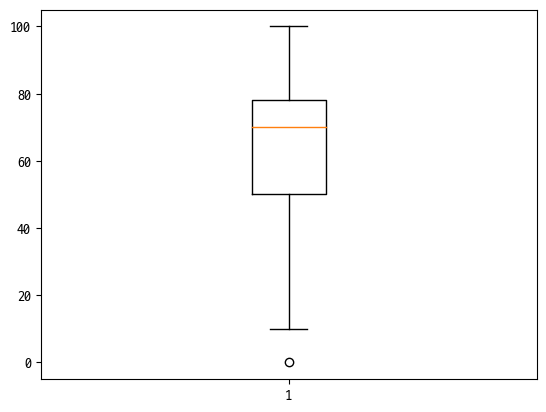

In [8]:
plt.boxplot(scores)
plt.show()

## 평균 표시하기
* showmeans=True
* meanline=True

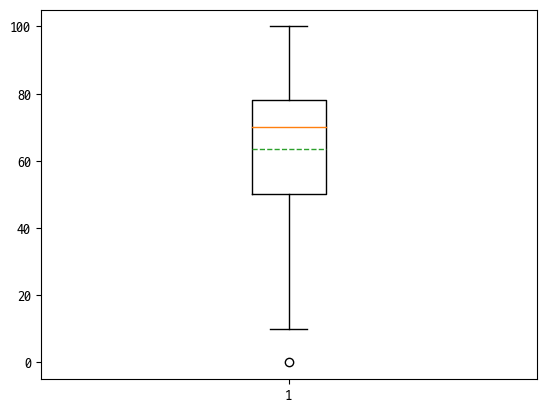

In [12]:
plt.boxplot(scores, showmeans=True, meanline=True)
plt.show()

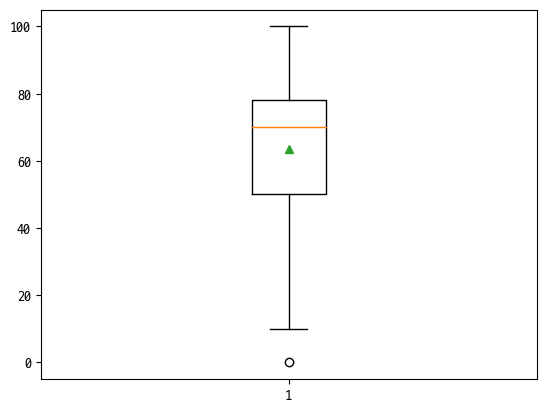

In [13]:
plt.boxplot(scores, showmeans=True)
plt.show()

## 수평 박스플롯
* vert=False

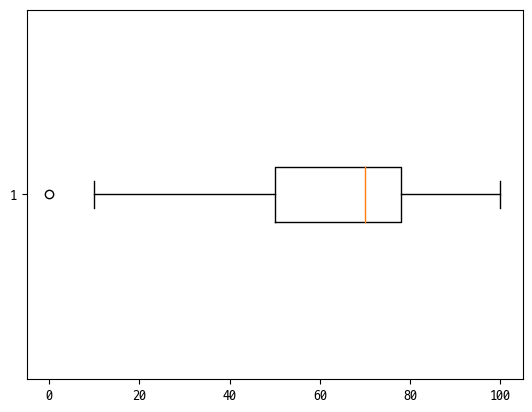

In [14]:
plt.boxplot(scores, vert=False)
plt.show()

# 여러개의 데이터 비교하기

## 샘플 데이터
* 붓꽃 데이터

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 여러 개의 데이터 비교하기
* plt.boxplot(데이터리스트, labels=레이블리스트)

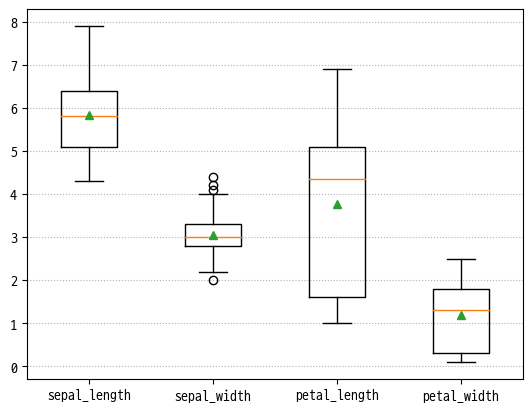

In [26]:
col = iris.columns[:4]

plt.boxplot([iris['sepal_length'], iris['sepal_width'], iris['petal_length'], iris['petal_width']], 
            labels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], showmeans=True)

plt.grid(axis='y', ls=':')
plt.show()